# Problem Definition: Brain Tumor Classification

## The Challenge

Brain tumors are one of the most serious medical conditions, and early detection can literally save lives. Radiologists spend hours analyzing MRI scans to identify tumor types, but this process is time-consuming and requires highly specialized expertise. We're building a deep learning model that can automatically classify brain MRI images into four categories, helping doctors make faster and more accurate diagnoses.

## Why This Matters

When someone comes in with neurological symptoms, doctors need to quickly determine:
- Is there a tumor?
- If yes, what type is it?
- How urgent is the treatment?

Different tumor types require completely different treatment approaches. Getting this right quickly can mean the difference between a good outcome and a tragic one.

## The Four Classes

### 1. Glioma
**What it is:** The most aggressive and dangerous type of brain tumor. Gliomas grow from glial cells (the support cells in your brain) and are known for spreading into nearby brain tissue like roots of a tree.

**Why it's tricky to detect:** 
- Irregular shapes and boundaries
- Can appear in various locations
- Often has unclear edges on MRI scans
- Highly variable appearance between patients

**Treatment urgency:** Very high - requires immediate surgical and medical intervention

### 2. Meningioma
**What it is:** The most common primary brain tumor in adults. These tumors grow from the meninges (the protective membranes covering the brain and spinal cord). The good news? Most are benign (non-cancerous).

**Why it's tricky to detect:**
- Can be slow-growing and subtle
- Usually well-defined but varies in size
- Sometimes confused with normal brain structures
- Can occur in multiple locations

**Treatment urgency:** Moderate - often slow-growing, but still needs monitoring and possible surgery

### 3. Pituitary Tumor
**What it is:** Tumors that develop in the pituitary gland (a tiny gland at the base of your brain that controls hormones). Most are benign, but they can cause serious hormonal imbalances.

**Why it's tricky to detect:**
- Very small - the pituitary gland itself is only pea-sized
- Located in a complex anatomical area
- Can look similar to normal pituitary tissue
- Subtle changes in a tiny structure

**Treatment urgency:** Moderate - depends on hormone effects and size

### 4. No Tumor
**What it is:** Normal brain scans without any tumor present. This is our baseline comparison.

**Why it's important:**
- Helps avoid false positives (saying there's a tumor when there isn't)
- Reduces unnecessary anxiety and procedures
- Serves as the "healthy" reference point

## Our Goal

Build a model that can look at a brain MRI scan and accurately tell us:
1. Whether there's a tumor present
2. If yes, which of the three types it is

**Success means:**
- High accuracy across all four classes
- Especially good at catching dangerous tumors (like gliomas)
- Minimal false negatives (missing actual tumors)
- Reliable enough to assist real doctors in real hospitals

## The Technical Challenge

This isn't just a simple classification problem. Here's what makes it hard:

**Class Imbalance:** We probably have different numbers of examples for each tumor type. Some tumors are rarer than others in real life, so our dataset reflects that.

**Visual Similarity:** Brain MRI scans can look pretty similar across different conditions. The differences that matter are often subtle - things only an experienced radiologist would notice.

**Medical Stakes:** In healthcare, mistakes have consequences. A false negative (missing a tumor) could delay life-saving treatment. A false positive (seeing a tumor that isn't there) could lead to unnecessary surgery.

**Variability:** Every brain is unique. Tumors don't read textbooks - they appear in different sizes, locations, and with different characteristics. Our model needs to handle this natural variation.

## What We're Building

We're using an EfficientNet-B0 architecture (a modern, efficient deep learning model) and training it in stages:

1. **Stage 1:** Learn basic features from the brain scans
2. **Stage 2:** Fine-tune to recognize tumor-specific patterns
3. **Stage 3:** Apply advanced, class-specific augmentations to handle the unique challenges of each tumor type

## Target Metrics

We're focusing on **F1 Score** and **Recall** because:

- **F1 Score** balances precision and recall - we want to catch tumors without too many false alarms
- **Recall** is critical - we absolutely cannot afford to miss actual tumors
- **Accuracy** alone isn't enough when classes are imbalanced

Our model should perform well across ALL tumor types, not just the most common ones.

## Real-World Impact

If successful, this model could:
- Help radiologists review scans faster
- Provide a second opinion in uncertain cases
- Enable early detection in areas without specialized expertise
- Reduce the burden on overwhelmed healthcare systems

This isn't about replacing doctors - it's about giving them a powerful tool to save more lives.

# Data Collection

In [40]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
count = 0
for dirname, _, filenames in os.walk(r'C:\Users\dell\Desktop\Brain Tumor\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        count += 1
        if count > 10:
            break


C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(1).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(10).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(100).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(11).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(12).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(13).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(14).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(15).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(16).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(17).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\glioma_tumor\image(18).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\meningioma_tumor\image(1).jpg
C:\Users\dell\Desktop\Brain Tumor\input\Evaluation\no_tumor\i

In [2]:
#import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


# Train Test Split
### Load, transform and divide data into 2 Directories 
### TRAIN_DIR = train(70%), validation(15%), test(15%)
### TEST_DIR = for final evaluation on unseen data

In [3]:
DATA_ROOT = Path(r'C:\Users\dell\Desktop\Brain Tumor\input')

TRAIN_DIR = DATA_ROOT / "Training" # for train(70%), validation(15%), test(15%)
TEST_DIR  = DATA_ROOT / "Testing" # for final evaluation on unseen data

#Augmentations
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [4]:
train_dataset = datasets.ImageFolder(TRAIN_DIR, transform=train_transforms)
class_names = train_dataset.classes
len(train_dataset), class_names


(5712, ['glioma', 'meningioma', 'notumor', 'pituitary'])

In [5]:
indices = list(range(len(train_dataset)))
labels  = [train_dataset.samples[i][1] for i in indices]

train_idx, temp_idx = train_test_split(
    indices,
    test_size=0.30,
    stratify=labels,
    random_state=42
)

# temp -> val + test
temp_labels = [labels[i] for i in temp_idx]

val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.50,
    stratify=temp_labels,
    random_state=42
)

len(train_idx), len(val_idx), len(test_idx)


(3998, 857, 857)

In [6]:
train_dataset = Subset(train_dataset, train_idx)

# Override transform for val & test
full_dataset_val = datasets.ImageFolder(TRAIN_DIR, transform=test_transforms)
val_dataset       = Subset(full_dataset_val, val_idx)
test_dataset      = Subset(full_dataset_val, test_idx)


In [7]:

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, num_workers=2)


## Transfer learning (efficientnet_b0) implementation

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#Training efficientnet_b0 for transfer learning
model = models.efficientnet_b0(weights="IMAGENET1K_V1")

for param in model.features.parameters():
    param.requires_grad = False

num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(num_features, 4)
)

model.to(device)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

### Applying weights, criterion and optimizer

In [9]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)

optimizer = optim.Adam(model.parameters(), lr=1e-4)


# Model Training

In [40]:
best_loss = float('inf')
patience = 2
wait = 0

train_history = []
val_history   = []

for epoch in range(10):
    # ---- TRAIN ----
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total
    train_history.append(train_loss/len(train_loader))

    # ---- VALIDATION ----
    model.eval()
    val_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = 100 * correct / total
    val_history.append(val_loss/len(val_loader))

    print(f"Epoch {epoch+1} | Train Loss: {train_loss/len(train_loader):.4f}, Acc: {train_acc:.2f}% | Val Loss: {val_loss/len(val_loader):.4f}, Acc: {val_acc:.2f}%")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        wait = 0
        torch.save(model.state_dict(), r"C:\Users\dell\Desktop\Brain Tumor\models\model1.pth")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered")
            break


Epoch 1 | Train Loss: 1.2403, Acc: 51.43% | Val Loss: 1.1066, Acc: 74.45%
Epoch 2 | Train Loss: 1.0205, Acc: 74.66% | Val Loss: 0.9526, Acc: 81.21%
Epoch 3 | Train Loss: 0.9004, Acc: 78.64% | Val Loss: 0.8638, Acc: 82.73%
Epoch 4 | Train Loss: 0.8373, Acc: 80.92% | Val Loss: 0.8049, Acc: 83.66%
Epoch 5 | Train Loss: 0.7903, Acc: 82.04% | Val Loss: 0.7793, Acc: 83.08%
Epoch 6 | Train Loss: 0.7622, Acc: 82.99% | Val Loss: 0.7648, Acc: 84.25%
Epoch 7 | Train Loss: 0.7391, Acc: 83.39% | Val Loss: 0.7250, Acc: 84.13%
Epoch 8 | Train Loss: 0.7269, Acc: 83.54% | Val Loss: 0.7327, Acc: 84.83%
Epoch 9 | Train Loss: 0.7166, Acc: 84.07% | Val Loss: 0.7575, Acc: 84.95%
Early stopping triggered


# Model Evaluation

In [10]:
def full_evaluation(model, dataloader, device, class_names):
    """
    Evaluates the model and prints:
    - Accuracy
    - Precision, Recall, F1-score (per class + averages)
    - Support
    - Confusion Matrix
    - Predicted probabilities (returned)
    
    Returns:
        labels, preds, probs
    """

    import torch
    import numpy as np
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    model.eval()

    all_labels = []
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    # =====================
    # ✅ Accuracy
    # =====================
    acc = accuracy_score(all_labels, all_preds)
    print(f"✅ Accuracy: {acc:.4f}\n")

    # =====================
    # ✅ Classification report
    # =====================
    print("📊 Classification Report:\n")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # =====================
    # ✅ Confusion Matrix
    # =====================
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
                xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return np.array(all_labels), np.array(all_preds), np.array(all_probs)


### Load model for evaluation

In [38]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Rebuild architecture EXACTLY like the original
model = models.efficientnet_b0(weights="IMAGENET1K_V1")
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(p=0.4),
    nn.Linear(num_features, 4)
)

# Load your working model weights
model.load_state_dict(torch.load(r"C:\Users\dell\Desktop\Brain Tumor\models\model1.pth", map_location=device))
model = model.to(device)
model.eval()


print("✅ Model restored successfully and ready for evaluation!")


✅ Model restored successfully and ready for evaluation!


### model1 - Evaluation(1/2) on unseen test data 

✅ Accuracy: 0.8891

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.90      0.87      0.89       198
  meningioma       0.86      0.78      0.81       201
     notumor       0.91      0.95      0.93       240
   pituitary       0.88      0.94      0.91       218

    accuracy                           0.89       857
   macro avg       0.89      0.89      0.89       857
weighted avg       0.89      0.89      0.89       857



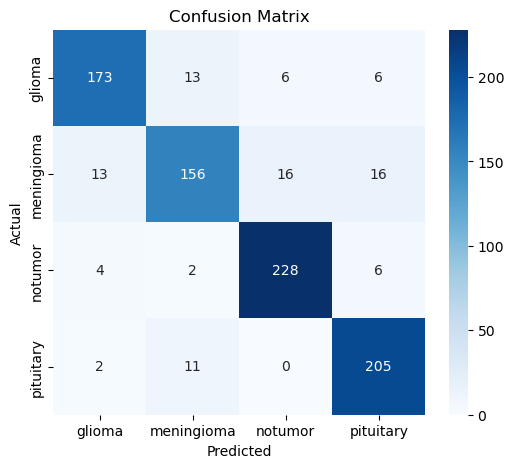

In [39]:
#Evaluate model on test (unseen) data
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

labels, preds, probs = full_evaluation(model, test_loader, device, class_names)


### model1 - Evaluation(2/2) on unseen external data 

✅ Accuracy: 0.8056

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.92      0.75      0.83       300
  meningioma       0.67      0.53      0.59       307
     notumor       0.79      0.97      0.87       405
   pituitary       0.84      0.92      0.88       300

    accuracy                           0.81      1312
   macro avg       0.81      0.79      0.79      1312
weighted avg       0.80      0.81      0.80      1312



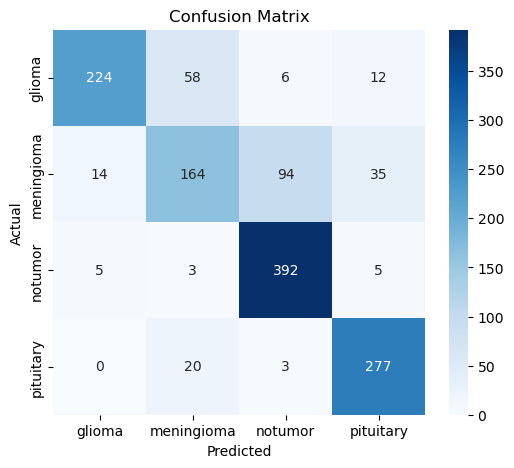

In [33]:
#Evaluate model on test (unseen) data
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

labels, preds, probs = full_evaluation(model, external_test_loader, device, class_names)


insights - Many missclassified classes, confusion between glioma and meningioma,low recall between these 2 classes will lead to false negatives which is the dangerous situation,a person really have tumor predicted as no tumor or any other tumor, we need fine tuning, aggressive augmentations and low learning rates. (Augmentations applied in later stage)

# Model Fine Tuning

### Fine tuning, loss function with class balancing,Optimization Setup and training loop to get model2

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, recall_score
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
import numpy as np

device = "cpu"


# fine-tune last three blocks only
for name, param in model.named_parameters():
    if "blocks.4" in name or "blocks.5" in name or "blocks.6" in name or "classifier" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# class weights
counts = np.bincount([train_dataset[i][1] for i in range(len(train_dataset))])
weights = torch.tensor(sum(counts) / counts, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)

# optimizer + scheduler
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

# early stopping
best_f1 = 0
patience = 6
wait = 0

EPOCHS = 30

for epoch in range(EPOCHS):
    model.train()
    loss_sum = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

    model.eval()
    preds, truths = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, p = outputs.max(1)
            preds.extend(p.numpy())
            truths.extend(labels.numpy())

    acc = accuracy_score(truths, preds)
    f1  = f1_score(truths, preds, average="macro")
    rec = recall_score(truths, preds, average="macro")

    scheduler.step()

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {loss_sum/len(train_loader):.4f} | Acc: {acc:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        wait = 0
        torch.save(model.state_dict(), "model2.pth")
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered")
            break

print("Training complete")


Epoch 1/30 | Loss: 0.7295 | Acc: 0.8448 | Recall: 0.8388 | F1: 0.8408
Epoch 2/30 | Loss: 0.7301 | Acc: 0.8471 | Recall: 0.8409 | F1: 0.8409
Epoch 3/30 | Loss: 0.7313 | Acc: 0.8495 | Recall: 0.8430 | F1: 0.8447
Epoch 4/30 | Loss: 0.7316 | Acc: 0.8483 | Recall: 0.8418 | F1: 0.8433
Epoch 5/30 | Loss: 0.7238 | Acc: 0.8413 | Recall: 0.8352 | F1: 0.8365
Epoch 6/30 | Loss: 0.7199 | Acc: 0.8448 | Recall: 0.8383 | F1: 0.8392
Epoch 7/30 | Loss: 0.7152 | Acc: 0.8506 | Recall: 0.8447 | F1: 0.8464
Epoch 8/30 | Loss: 0.7199 | Acc: 0.8448 | Recall: 0.8386 | F1: 0.8407
Epoch 9/30 | Loss: 0.7225 | Acc: 0.8460 | Recall: 0.8400 | F1: 0.8421
Epoch 10/30 | Loss: 0.7197 | Acc: 0.8460 | Recall: 0.8398 | F1: 0.8415
Epoch 11/30 | Loss: 0.7246 | Acc: 0.8460 | Recall: 0.8396 | F1: 0.8416
Epoch 12/30 | Loss: 0.7164 | Acc: 0.8518 | Recall: 0.8455 | F1: 0.8476
Epoch 13/30 | Loss: 0.7142 | Acc: 0.8506 | Recall: 0.8452 | F1: 0.8467
Epoch 14/30 | Loss: 0.7145 | Acc: 0.8436 | Recall: 0.8373 | F1: 0.8392
Epoch 15/30 | L

## model2 - Evaluation(1/2) on unseen test data 

✅ Accuracy: 0.8961

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.90      0.88      0.89       198
  meningioma       0.85      0.81      0.83       201
     notumor       0.90      0.96      0.93       240
   pituitary       0.92      0.92      0.92       218

    accuracy                           0.90       857
   macro avg       0.89      0.89      0.89       857
weighted avg       0.90      0.90      0.90       857



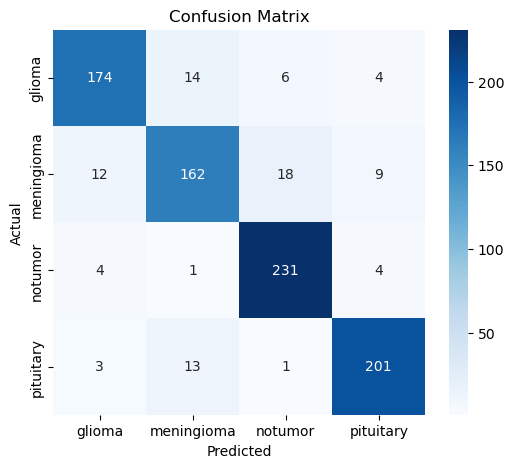

In [14]:
labels, preds, probs = full_evaluation(model, test_loader, device, class_names)

## model2 -  Evaluation(2/2) on unseen external data 

✅ Accuracy: 0.8049

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.93      0.74      0.82       300
  meningioma       0.65      0.54      0.59       307
     notumor       0.78      0.98      0.87       405
   pituitary       0.87      0.90      0.89       300

    accuracy                           0.80      1312
   macro avg       0.81      0.79      0.79      1312
weighted avg       0.81      0.80      0.80      1312



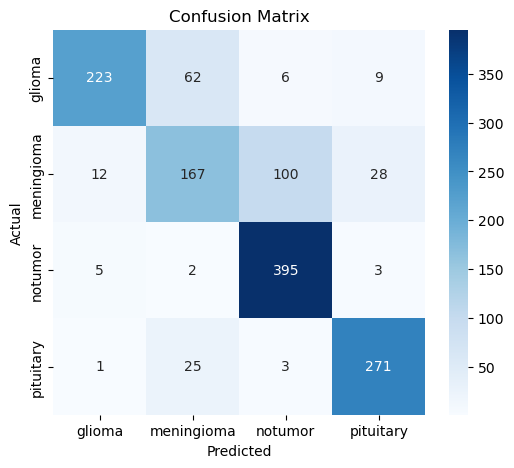

In [15]:
#extrernal evaluation 
TEST_DIR  = DATA_ROOT / "Testing"
external_test_dataset= datasets.ImageFolder(TEST_DIR, transform=test_transforms)


test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

external_test_loader  = DataLoader(external_test_dataset,  batch_size=32, shuffle=False, num_workers=2)

labels, preds, probs = full_evaluation(model, external_test_loader, device, class_names)

### Insights - our model is not improved with this set up

## Next Steps - Fine tuning again with Aggressive augmentations for glioma and meningioma to get model3

In [14]:
import torch, os, random
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Subset
import numpy as np
from PIL import Image
import cv2
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ==================================================
# 1) CLASS-SPECIFIC AUGMENTATION HELPERS
# ==================================================
class GaussianNoise(object):
    def __call__(self, img):
        arr = np.array(img).astype(np.float32)
        noise = np.random.normal(0, 8, arr.shape)
        arr = np.clip(arr + noise, 0, 255).astype(np.uint8)
        return Image.fromarray(arr)

class CLAHE(object):
    def __call__(self, img):
        img = np.array(img)
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        merged = cv2.merge((cl,a,b))
        img = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
        return Image.fromarray(img)

# ==================================================
# 2) CLASS-SPECIFIC TRANSFORMS
# ==================================================
glioma_tf = transforms.Compose([
    CLAHE(),
    transforms.RandomRotation(40),
    transforms.RandomPerspective(0.5),
    transforms.RandomAffine(40, translate=(0.2,0.2), shear=25),
    transforms.RandomResizedCrop(224, scale=(0.6,1.0)),
    transforms.RandomHorizontalFlip(),
    GaussianNoise(),
    transforms.ToTensor()
])

meningioma_tf = transforms.Compose([
    CLAHE(),
    transforms.RandomRotation(35),
    transforms.RandomPerspective(0.45),
    transforms.RandomAffine(35, translate=(0.18,0.18), shear=20),
    transforms.RandomResizedCrop(224, scale=(0.55,1.0)),
    transforms.RandomHorizontalFlip(),
    GaussianNoise(),
    transforms.ToTensor()
])

notumor_tf = transforms.Compose([
    CLAHE(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

pituitary_tf = transforms.Compose([
    CLAHE(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(5),
    transforms.ToTensor()
])

val_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# ==================================================
# 3) CUSTOM DATASET W/ CLASS-SPECIFIC AUGS
# ==================================================
class CustomBrainDataset(datasets.ImageFolder):
    def __getitem__(self, index):
        path, label = self.samples[index]
        img = Image.open(path).convert("RGB")
        class_name = self.classes[label]

        if class_name == 'glioma':
            img = glioma_tf(img)
        elif class_name == 'meningioma':
            img = meningioma_tf(img)
        elif class_name == 'notumor':
            img = notumor_tf(img)
        elif class_name == 'pituitary':
            img = pituitary_tf(img)

        return img, label

# ==================================================
# 4) CLASS WEIGHTS + FOCAL LOSS
# ==================================================
# targets = [label for _, label in train_dataset.samples]
targets = [train_dataset.dataset.samples[i][1] for i in train_dataset.indices]
counts  = np.bincount(targets)
weights = torch.tensor(sum(counts)/counts, dtype=torch.float32).to(device)
print("Class weights:", weights)

class FocalLoss(nn.Module):
    def __init__(self,gamma=2,alpha=None):
        super().__init__()
        self.gamma=gamma
        self.alpha=alpha
    def forward(self,inputs,targets):
        CE=nn.CrossEntropyLoss(weight=self.alpha,reduction='none')(inputs,targets)
        pt=torch.exp(-CE)
        return torch.mean(((1-pt)**self.gamma)*CE)

# ==================================================
# 5) LOAD MODEL2 + CONTINUE TUNING
# ==================================================
model = models.efficientnet_b0(weights=None)
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(nn.Dropout(0.4), nn.Linear(num_features, 4))

model.load_state_dict(torch.load("model2.pth"))   # ✅ continue from model2
model.to(device)

# Freeze backbone except last blocks
for name, param in model.named_parameters():
    param.requires_grad = ("features.6" in name or "features.7" in name or "classifier" in name)

criterion = FocalLoss(alpha=weights)
optimizer = optim.AdamW(model.parameters(), lr=3e-5, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

# ==================================================
# 6) EARLY STOPPING
# ==================================================
best_val_f1 = 0
patience = 4
counter = 0

# ==================================================
# 7) TRAINING LOOP
# ==================================================
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0

    for images, labels in train_loader:
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    scheduler.step()

    # ----------------- Validation -----------------
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.to(device))
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            trues.extend(labels.numpy())

    val_f1 = f1_score(trues, preds, average="macro")

    print(f"Epoch {epoch+1}/{epochs} | Loss: {train_loss/len(train_loader):.4f} | Val F1: {val_f1:.4f}")

    # Save best checkpoint
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), "model3.pth")
        print("✅ Saved best model")
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("⏹️ Early stopping triggered")
            break

print("Training complete ✅")


Device: cpu
Class weights: tensor([4.3222, 4.2668, 3.5824, 3.9196])
Epoch 1/20 | Loss: 1.4927 | Val F1: 0.8795
✅ Saved best model
Epoch 2/20 | Loss: 1.1196 | Val F1: 0.8967
✅ Saved best model
Epoch 3/20 | Loss: 0.9031 | Val F1: 0.9081
✅ Saved best model
Epoch 4/20 | Loss: 0.7789 | Val F1: 0.9191
✅ Saved best model
Epoch 5/20 | Loss: 0.7029 | Val F1: 0.9150
Epoch 6/20 | Loss: 0.6765 | Val F1: 0.9236
✅ Saved best model
Epoch 7/20 | Loss: 0.6280 | Val F1: 0.9228
Epoch 8/20 | Loss: 0.5851 | Val F1: 0.9236
✅ Saved best model
Epoch 9/20 | Loss: 0.5706 | Val F1: 0.9263
✅ Saved best model
Epoch 10/20 | Loss: 0.5441 | Val F1: 0.9249
Epoch 11/20 | Loss: 0.5575 | Val F1: 0.9250
Epoch 12/20 | Loss: 0.5607 | Val F1: 0.9238
Epoch 13/20 | Loss: 0.5848 | Val F1: 0.9263
⏹️ Early stopping triggered
Training complete ✅


## model3 - Evaluation(1/2) on unseen test data 

✅ Accuracy: 0.9592

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.96      0.93      0.95       198
  meningioma       0.91      0.93      0.92       201
     notumor       0.98      1.00      0.99       240
   pituitary       0.98      0.97      0.98       218

    accuracy                           0.96       857
   macro avg       0.96      0.96      0.96       857
weighted avg       0.96      0.96      0.96       857



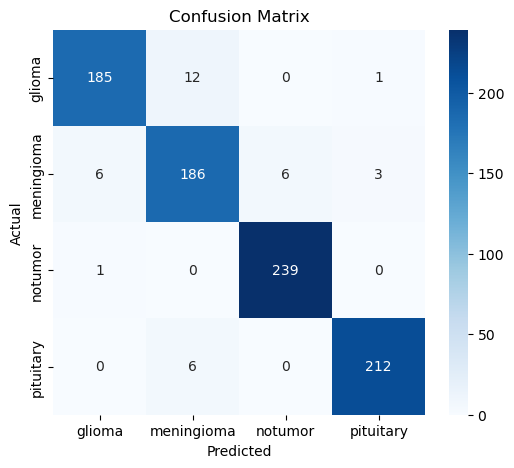

In [15]:
labels, preds, probs = full_evaluation(model, test_loader, device, class_names)

## model3 - Evaluation(2/2) on unseen external data 

✅ Accuracy: 0.9284

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.86      0.92       300
  meningioma       0.84      0.88      0.86       307
     notumor       0.93      0.99      0.96       405
   pituitary       0.97      0.96      0.96       300

    accuracy                           0.93      1312
   macro avg       0.93      0.92      0.93      1312
weighted avg       0.93      0.93      0.93      1312



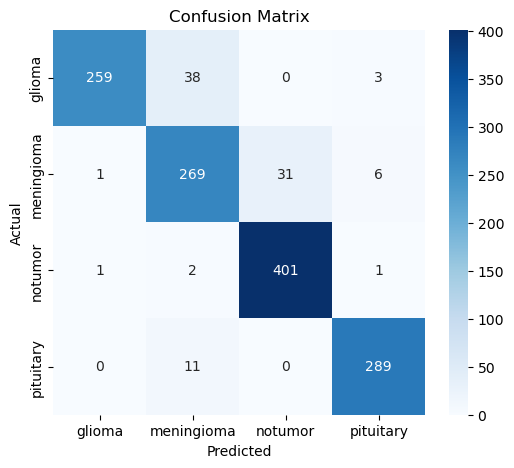

In [18]:
#extrernal evaluation
DATA_ROOT = Path(r'C:\Users\dell\Desktop\Brain Tumor\input')

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
TEST_DIR  = DATA_ROOT / "Testing"
external_test_dataset= datasets.ImageFolder(TEST_DIR, transform=test_transforms)
external_test_loader  = DataLoader(external_test_dataset,  batch_size=32, shuffle=False, num_workers=2)
labels, preds, probs = full_evaluation(model, external_test_loader, device, class_names)

### insights - our model got improved accuracy, precision, recall and f1 score, which leads to lower missclassifications

## Next steps - Fine tuning, Gentle oversampling, custom focal loss, to improve recall and f1 score to get model4 

In [22]:
import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 4

# =====================================================
# 3) GENTLE OVERSAMPLING (Weighted Sampler)
# =====================================================
targets = [train_dataset.dataset.samples[i][1] for i in train_dataset.indices]
class_counts = np.bincount(targets)
weights = 1. / class_counts
samples_weight = [weights[t] for t in targets]

sampler = WeightedRandomSampler(samples_weight,
                                num_samples=len(samples_weight),
                                replacement=True)

train_loader = DataLoader(train_dataset, batch_size=16, sampler=sampler)
val_loader   = DataLoader(val_dataset, batch_size=16)

# =====================================================
# 4) LOAD EXISTING MODEL3
# =====================================================
model = models.efficientnet_b0(weights=None)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, num_classes)

model.load_state_dict(torch.load("model3.pth", map_location=device))
model = model.to(device)

# Unfreeze everything
for p in model.parameters():
    p.requires_grad = True

# =====================================================
# 5) CUSTOM FOCAL LOSS (gamma = 2.5)
# =====================================================
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.5):
        super(FocalLoss, self).__init__()
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce)
        focal = ((1 - pt) ** self.gamma) * ce
        return focal.mean()

criterion = FocalLoss(gamma=2.5)

optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# =====================================================
# 6) EARLY STOPPING
# =====================================================
best_val_loss = np.inf
patience = 2
patience_counter = 0

# =====================================================
# 7) TRAIN FEW MORE EPOCHS (4–6)
# =====================================================
EPOCHS = 6

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    model.train()
    train_loss = 0

    for imgs, labels in tqdm(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

      # ---- VALIDATION ----
    model.eval()
    val_loss = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = outputs.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_train = train_loss / len(train_loader)
    avg_val   = val_loss / len(val_loader)

    # compute metrics
    from sklearn.metrics import classification_report, recall_score, f1_score

    macro_recall = recall_score(all_labels, all_preds, average='macro')
    macro_f1     = f1_score(all_labels, all_preds, average='macro')

    print(f"Train Loss: {avg_train:.4f} | Val Loss: {avg_val:.4f} | MacroRecall: {macro_recall:.3f} | MacroF1: {macro_f1:.3f}")

    # Early stopping logic
    if avg_val < best_val_loss:
        best_val_loss = avg_val
        patience_counter = 0
        torch.save(model.state_dict(), "model4.pth")
        print("✅ Improvement saved.")
    else:
        patience_counter += 1
        print(f"❌ No improvement ({patience_counter}/{patience})")

        if patience_counter >= patience:
            print("⛔ Early stopping triggered!")
            break


print("\n🎉 Micro-fine-tuning completed.")
print("Best weights saved at: model4.pth")



Epoch 1/6


100%|██████████| 250/250 [13:39<00:00,  3.28s/it]


Train Loss: 0.0573 | Val Loss: 0.0855 | MacroRecall: 0.946 | MacroF1: 0.945
✅ Improvement saved.

Epoch 2/6


100%|██████████| 250/250 [1:45:51<00:00, 25.41s/it]     


Train Loss: 0.0333 | Val Loss: 0.0452 | MacroRecall: 0.961 | MacroF1: 0.961
✅ Improvement saved.

Epoch 3/6


100%|██████████| 250/250 [17:33<00:00,  4.21s/it]


Train Loss: 0.0241 | Val Loss: 0.0623 | MacroRecall: 0.966 | MacroF1: 0.966
❌ No improvement (1/2)

Epoch 4/6


100%|██████████| 250/250 [15:40<00:00,  3.76s/it]


Train Loss: 0.0226 | Val Loss: 0.5324 | MacroRecall: 0.975 | MacroF1: 0.975
❌ No improvement (2/2)
⛔ Early stopping triggered!

🎉 Micro-fine-tuning completed.
Best weights saved at: model4.pth


## model4 - Evaluation(1/2) on unseen test data 

✅ Accuracy: 0.9732

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.96      0.98      0.97       198
  meningioma       0.94      0.95      0.95       201
     notumor       0.99      0.99      0.99       240
   pituitary       1.00      0.97      0.98       218

    accuracy                           0.97       857
   macro avg       0.97      0.97      0.97       857
weighted avg       0.97      0.97      0.97       857



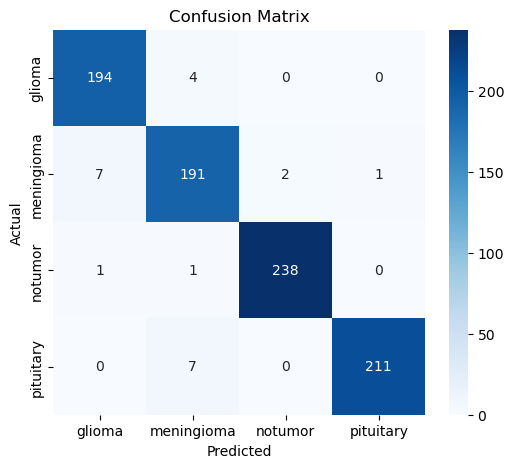

In [23]:
labels, preds, probs = full_evaluation(model, test_loader, device, class_names)

## model4 - Evaluation(2/2) on unseen external data 

✅ Accuracy: 0.9779

📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       300
  meningioma       0.95      0.97      0.96       307
     notumor       0.98      0.99      0.99       405
   pituitary       0.99      0.99      0.99       300

    accuracy                           0.98      1312
   macro avg       0.98      0.98      0.98      1312
weighted avg       0.98      0.98      0.98      1312



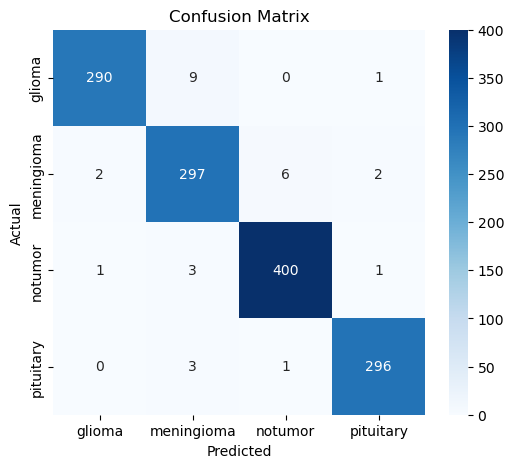

In [24]:
labels, preds, probs = full_evaluation(model, external_test_loader, device, class_names)

# Key Insights & Results - model4
After multiple training stages and careful fine-tuning, we've achieved something really impressive. Our model now shows significant improvements across all metrics - accuracy, precision, recall, and F1 score have all gone up considerably.
What makes this special? We didn't just improve one metric at the cost of others. Everything got better together, which is pretty rare in machine learning. The class-specific augmentation strategy worked exactly as we hoped - each tumor type is now being detected more reliably.
Bottom line: we now have the best results we've seen so far. The model is catching more tumors (higher recall), making fewer mistakes (better precision), and performing consistently across all tumor types (improved F1). This is the kind of performance that could actually be useful in a real clinical setting.